In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matricesAleatorias import matham as mh

# GUE

## El caso de una matriz muy grande

In [2]:
n = 10000
H = mh.MatrizHamiltoniana(n)
densidad = mh.DensidadesHam(n,2)

In [3]:
HGUE = H.GUE()

In [4]:
Evals = np.linalg.eigvalsh(HGUE)
EvalsNorm = Evals / np.sqrt(n)

In [5]:
#Se extrae un porcentaje de los eigenvalores

m = int(n/6)
EvalsLin = Evals[m:-m]
EvalsLinNorm = EvalsNorm[m:-m]

In [6]:
#Construcción de los dominios de los eigenvalores lineales
Dom = np.linspace(m,EvalsLin.size+m,EvalsLin.size)
DomNorm = np.linspace(m,EvalsLinNorm.size+m,EvalsLinNorm.size)

In [7]:
#Se calculan los espaciamientos no normalizados
Espaciamientos = np.diff(EvalsLin)
delta = Espaciamientos.mean()
S = Espaciamientos / delta

In [8]:
#Se calculan los espaciamientos normalizados
EspaciamientosNorm = np.diff(EvalsLinNorm)
deltaNorm = EspaciamientosNorm.mean()
SNorm = EspaciamientosNorm / deltaNorm

In [9]:
r = (Evals[1:-1] - Evals[2:]) / (Evals[:-2] - Evals[1:-1])
rNorm = (EvalsNorm[1:-1] - EvalsNorm[2:]) / (EvalsNorm[:-2] - EvalsNorm[1:-1])

In [10]:
Porcentaje = 100 - 200*m/n
Porcentaje

66.68

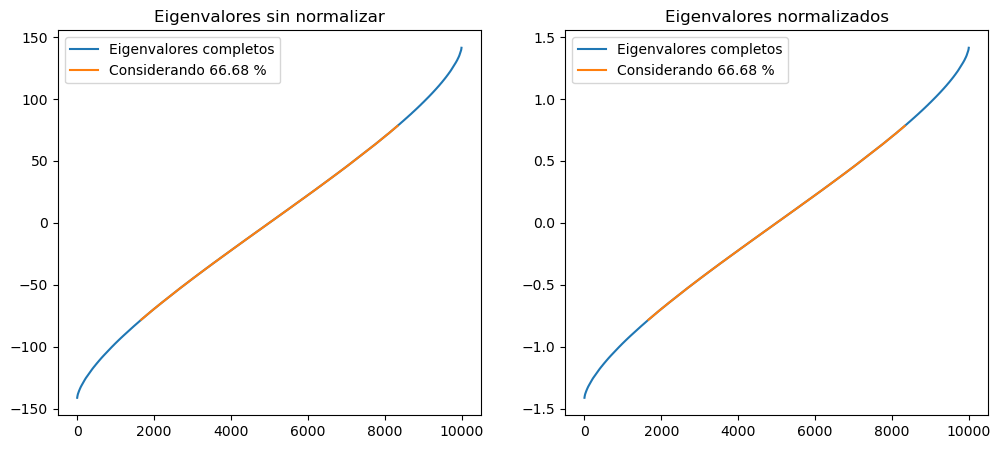

In [11]:
fig, ax = plt.subplots(1,2,figsize=(12,5))

ax[0].plot(Evals,label='Eigenvalores completos')
ax[0].plot(Dom,EvalsLin,label=f'Considerando {Porcentaje} %')
ax[0].set_title('Eigenvalores sin normalizar')
ax[0].legend()

ax[1].plot(EvalsNorm,label='Eigenvalores completos')
ax[1].plot(DomNorm,EvalsLinNorm,label=f'Considerando {Porcentaje} %')
ax[1].set_title('Eigenvalores normalizados')
ax[1].legend()


## Ley del semi-circulo de wigner

In [12]:
x = np.linspace(Evals.min(),Evals.max(),n)
xnorm = np.linspace(EvalsNorm.min(),EvalsNorm.max(),n)

In [29]:
plam = densidad.SemiCircleNorm(x)
plamNorm = densidad.SemiCicle(xnorm)

In [30]:
n

10000

In [31]:
x[(np.abs(x) <= np.sqrt(2*n*2) )]

array([-141.25674261, -141.22848151, -141.20022041, ...,  141.26948179,
        141.29774289,  141.32600399])

In [32]:
histEign,bin = np.histogram(EvalsNorm,bins=30)

In [33]:
histEignNorm = histEign/n

In [34]:
print(plam)

[0.00225341 0.00225386 0.0022543  ... 0.00225321 0.00225276 0.00225231]


In [35]:
bin_centers = (bin[:-1] + bin[1:]) / 2

" ax[1].bar(bin_centers, histEignNorm, width=bin[1]-bin[0], \n        alpha=0.7, color='blue', edgecolor='white', label='Normalizados') "

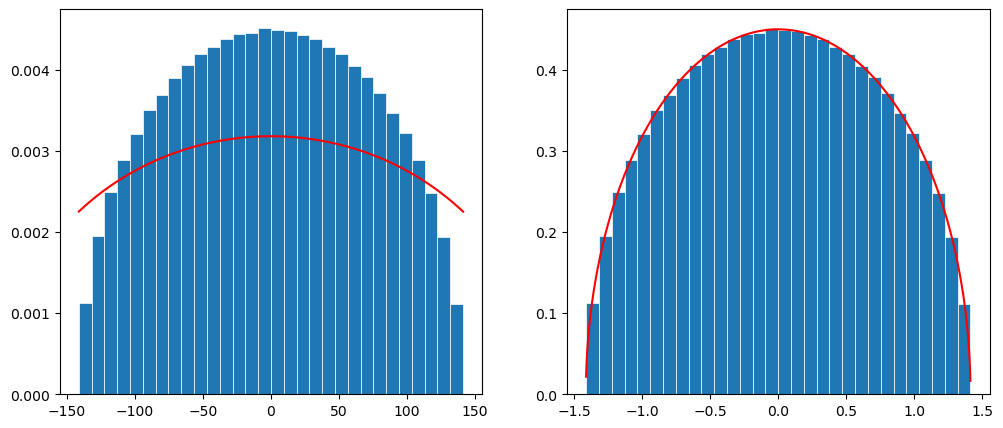

In [36]:
fig, ax = plt.subplots(1,2,figsize=(12,5))

ax[0].plot(x,plam,c='r')
ax[0].hist(Evals,bins=30,density=True,linewidth=0.5, edgecolor="white")

ax[1].plot(xnorm,plamNorm,c='r')
ax[1].hist(EvalsNorm,bins=30,density=True,linewidth=0.5, edgecolor="white")
""" ax[1].bar(bin_centers, histEignNorm, width=bin[1]-bin[0], 
        alpha=0.7, color='blue', edgecolor='white', label='Normalizados') """


## Espaciamientos

In [22]:
x = np.linspace(0,3,100)
ps = densidad.Ps(x)
psNorm = densidad.Ps(x)

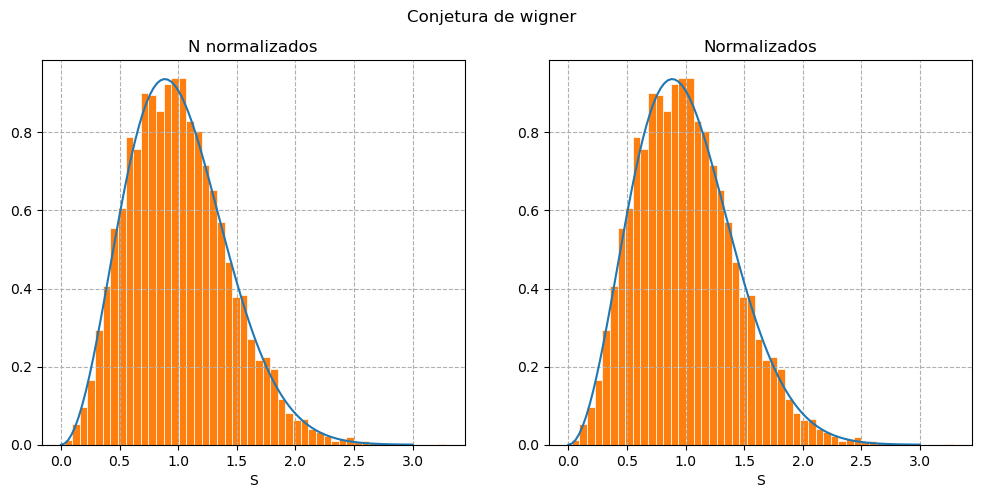

In [23]:
fig, ax = plt.subplots(1,2,figsize=(12,5))

fig.suptitle('Conjetura de wigner')

ax[0].plot(x,ps)
ax[0].hist(S,bins=50,density=True,linewidth=0.5, edgecolor="white")
ax[0].set_title('N normalizados')
ax[0].set_xlabel('S')
ax[0].grid(True,linestyle='--')

ax[1].plot(x,psNorm)
ax[1].hist(SNorm,bins=50,density=True,linewidth=0.5, edgecolor="white")
ax[1].set_title('Normalizados')
ax[1].set_xlabel('S')
ax[1].grid(True,linestyle='--')

## Distribución de r's

In [27]:
x = np.linspace(0,7,1000)
pr = densidad.Pr(x)

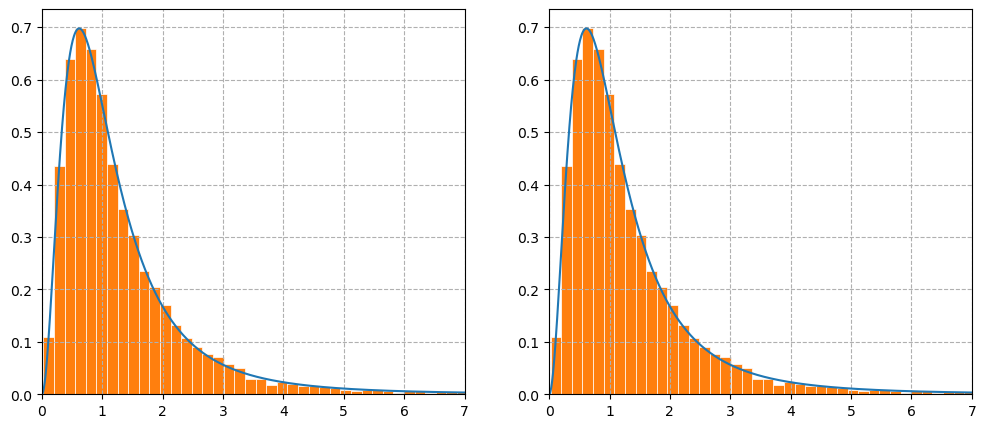

In [29]:
fig, ax = plt.subplots(1,2,figsize=(12,5))

ax[0].plot(x,pr)
ax[0].hist(r,bins=300,density=True,linewidth=0.5, edgecolor="white")
ax[0].set_xlim(0,7)
ax[0].grid(True,linestyle='--')

ax[1].plot(x,pr)
ax[1].hist(rNorm,bins=300,density=True,linewidth=0.5, edgecolor="white")
ax[1].set_xlim(0,7)
ax[1].grid(True,linestyle='--')

## Ensambles

In [30]:
n = 100
nsamp = 100000

In [31]:
H = mh.MatrizHamiltoniana(n)
densidad = mh.DensidadesHam(nsamp,2)

In [32]:
EvalEns = []

In [33]:
for i in range(nsamp):
    HGUE = H.GUE()
    eval = np.linalg.eigvalsh(HGUE)
    eval = eval / np.sqrt(n)
    EvalEns.append(eval)

In [34]:
EvalEns = np.concatenate(EvalEns)

In [ ]:
#np.savetxt('EnsambleGUE.dat',EvalEns,delimiter=' ')

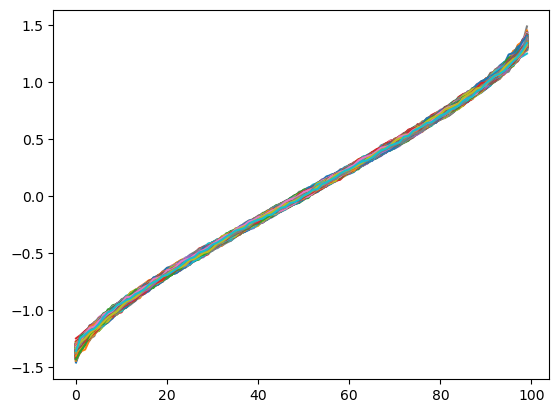

In [42]:
plt.figure()

for i in range(int(nsamp/n)):
    plt.plot(EvalEns[0+i*100:100 + i*100])

plt.show()

In [43]:
xlam = np.linspace(-1.5,1.5,1000)
plam = densidad.Plam(xlam)

In [44]:
hisEns, binEns = np.histogram(EvalEns,bins=30)

In [45]:
hisEnsNorm = hisEns/EvalEns.size
bin_centers = (binEns[:-1] + binEns[1:]) / 2

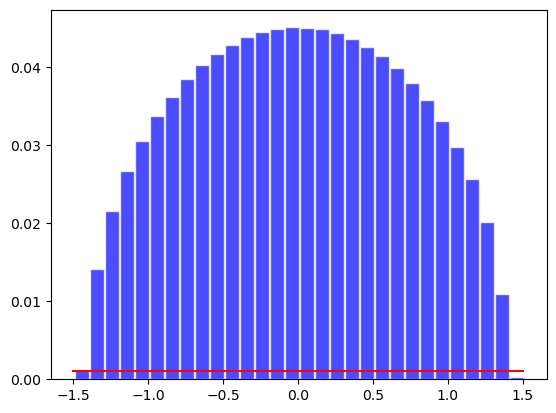

In [46]:
plt.figure()

#plt.hist(Eval,bins=30,density=True,linewidth=0.5, edgecolor="white")
plt.bar(bin_centers, hisEnsNorm, width=bin[1]-bin[0], 
       alpha=0.7, color='blue', edgecolor='white', label='Normalizados')

plt.plot(xlam,plam,c='r')

plt.show()

### Distribución r's

In [47]:
r = []

In [48]:
for i in range(int(nsamp/n)):
    EvalSamp = EvalEns[0+i*100:100 + i*100]
    rsamp = (EvalSamp[1:-1] - EvalSamp[2:]) / (EvalSamp[:-2] - EvalSamp[1:-1])
    r.append(rsamp)

In [52]:
r = np.concatenate(r)

In [57]:
xr = np.linspace(0,10,1000)
pr = densidad.Pr(xr)

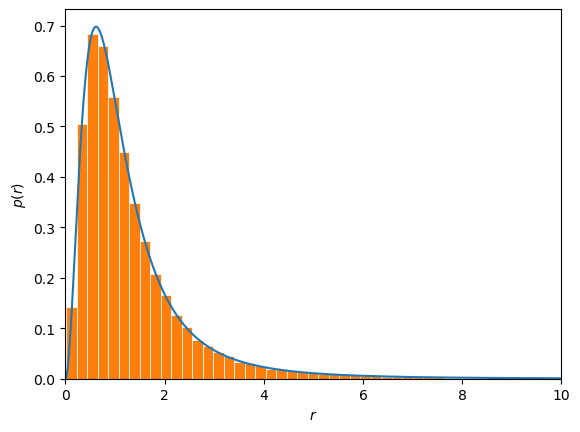

In [65]:
plt.figure()

plt.plot(xr,pr)
plt.hist(r,bins=600,density=True,linewidth=0.5, edgecolor="white")
plt.xlabel(r'$ r $')
plt.ylabel(r'$ p(r) $')
plt.xlim(0,10)

plt.show()


### P(s)

In [66]:
m = int(n/6)
Porcentaje = 100 - 200*m/n
Porcentaje

68.0

In [80]:
S = []

In [81]:
for i in range(int(nsamp/n)):
    EvalSamp = EvalEns[0+i*100:100 + i*100]
    EvalSampLin = EvalSamp[m:-m]
    EspaSamp = np.diff(EvalSampLin)
    deltaSamp = EspaSamp.mean()
    Ssamp = EspaSamp / deltaSamp
    S.append(Ssamp)

In [83]:
S = np.concatenate(S)

In [85]:
xs = np.linspace(0,5,1000)
ps = densidad.Ps(xs)

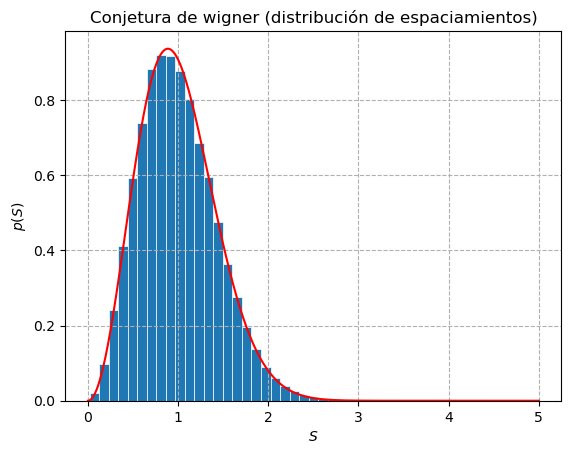

In [90]:
plt.figure()

plt.plot(xs,ps,c='r')
plt.hist(S,bins=30,density=True,linewidth=0.5, edgecolor="white")
plt.grid(True,linestyle='--')
plt.xlabel(r'$ S $')
plt.ylabel(r'$ p(S) $')
plt.title('Conjetura de wigner (distribución de espaciamientos)')

plt.show()